In [1]:
using DataFrames
using CSV
using TravelingSalesmanHeuristics

In [2]:
#WPrzemysław Szufel, orkshop on Optimziation Techniques for Data Science
# in Python and Julia, Fields Institute
distance_data = CSV.read("distance_Subway.csv", header=[:i, :j, :dist, :route]);
N = length(unique(distance_data.i))
const distance_mx = zeros(Float64,(N,N))
for r in 1:nrow(distance_data)
   distance_mx[distance_data.i[r],distance_data.j[r]] = distance_data.dist[r]
end

In [3]:
sol = TravelingSalesmanHeuristics.solve_tsp(distance_mx,quality_factor =100)

([71, 5, 81, 93, 20, 102, 28, 105, 44, 100  …  90, 18, 14, 21, 25, 23, 54, 11, 88, 71], 322163.50464619993)

In [4]:
POI_gps = CSV.read("Subway.csv");

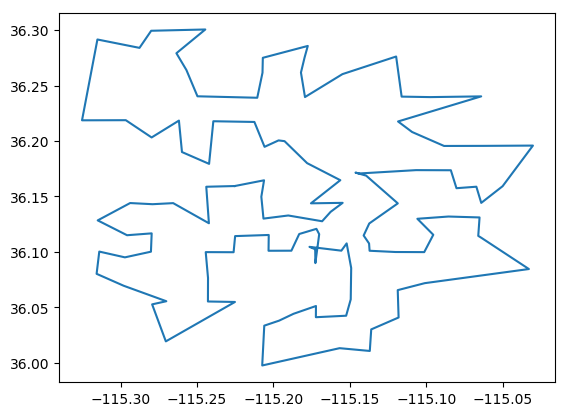

In [5]:
using PyPlot
ids = sol[1]
PyPlot.cla()
PyPlot.ioff()
PyPlot.plot(POI_gps.long[ids], POI_gps.latt[ids])
PyPlot.display_figs()
PyPlot.show()

In [6]:
#required installation for map vizualiztion
#using Conda
#Conda.runconda(`install folium -c conda-forge`)
using PyCall
flm = pyimport("folium")

n=length(ids)

m = flm.Map(location=[POI_gps.latt[1],POI_gps.long[1]])

# m = flm.Map(location=[POI_gps.latt[1],POI_gps.long[1]])

for i in ids
    flm.CircleMarker(location=[POI_gps.latt[i], POI_gps.long[i]],radius = 10,color="crimson").add_to(m)
end

for k in ids
    flm.PolyLine([[POI_gps.latt[getindex(ids, k)], POI_gps.long[getindex(ids, k)]],[POI_gps.latt[getindex(ids, k+1)], POI_gps.long[getindex(ids, k+1)]]]
).add_to(m)
end

m

PyObject <folium.folium.Map object at 0x000000002A93CBE0>

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/html")}, ::PyObject) at PyCall.jl:895
└ @ PyCall C:\Users\Alaa\.julia\packages\PyCall\ttONZ\src\PyCall.jl:895
